In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc,roc_auc_score, precision_score, recall_score,f1_score, roc_curve
from matplotlib import pyplot as plt
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Import data**

In [2]:
data_path = 'https://raw.githubusercontent.com/sahdan96/randomforest/main/train_2v.csv'
data = pd.read_csv(data_path)

# **pre-processing data**

In [3]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.dropna(axis=0, inplace=True)
data.drop(columns ='id', inplace =True)

In [4]:
encode_gender = LabelEncoder()
encode_marry = LabelEncoder()
encode_work = LabelEncoder()
encode_residence = LabelEncoder()
encode_smoking = LabelEncoder()
data['gender'] = encode_gender.fit_transform(data['gender'])
data['ever_married'] = encode_marry.fit_transform(data['ever_married'])
data['work_type'] = encode_work.fit_transform(data['work_type'])
data['Residence_type'] = encode_residence.fit_transform(data['Residence_type'])
data['smoking_status'] = encode_smoking.fit_transform(data['smoking_status'])

# **split data**

In [5]:
x = data.drop('stroke', axis=1)
y = data.stroke

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
print("train class count: \n" +str(y_train.value_counts())+"\n\ntest class count: \n" + str(y_test.value_counts()))

train class count: 
0    23578
1      508
Name: stroke, dtype: int64

test class count: 
0    5892
1     130
Name: stroke, dtype: int64


# **Undersampling**

In [8]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
## train class count
print("before sampling:\n"+ str(Counter(y_train))+"\n\nafter sampling:\n"+ str(Counter(Y_train_resampled)))

before sampling:
Counter({0: 23578, 1: 508})

after sampling:
Counter({0: 508, 1: 508})


# **training + testing/prediction**

In [10]:
rf_model = RandomForestClassifier(bootstrap=True, max_depth=None, 
                                  max_features='auto', max_leaf_nodes= None,
                                  min_impurity_decrease= 0.0, min_impurity_split=None,
                                  min_samples_leaf= 1, min_samples_split= 2,
                                  min_weight_fraction_leaf=0.0, 
                                  n_estimators=100, random_state=42,
                                n_jobs=None, oob_score=False,
                       verbose=0, warm_start=False)

rf_model.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

# **train & test benchmark**

In [12]:
acc = accuracy_score(Y_train_resampled, y_train_pred)
pre = precision_score(Y_train_resampled, y_train_pred)
re = recall_score(Y_train_resampled, y_train_pred)
f1 = f1_score(Y_train_resampled, y_train_pred)

acc2 = accuracy_score(y_test, y_test_pred)
pre2 = precision_score(y_test, y_test_pred)
re2 = recall_score(y_test, y_test_pred)
f12 = f1_score(y_test, y_test_pred)
print("training benchmark:")
print("accuracy:\t"+str(acc)+"\nprecision:\t"+str(pre)+"\nrecall:\t\t"+str(re)+"\nf1:\t\t"+str(f1))
print("\ntesting benchmark:")
print("accuracy:\t"+str(acc2)+"\nprecision:\t"+str(pre2)+"\nrecall:\t\t"+str(re2)+"\nf1:\t\t"+str(f12))

training benchmark:
accuracy:	1.0
precision:	1.0
recall:		1.0
f1:		1.0

testing benchmark:
accuracy:	0.7356360013284623
precision:	0.05804111245465538
recall:		0.7384615384615385
f1:		0.10762331838565023


In [13]:
cm= confusion_matrix(Y_train_resampled,y_train_pred)
cm2= confusion_matrix(y_test,y_test_pred)
print("confusion matrix for training:\n"+str(cm)+"\n\nconfusion matrix for testing:\n"+str(cm2))

confusion matrix for training:
[[508   0]
 [  0 508]]

confusion matrix for testing:
[[4334 1558]
 [  34   96]]


In [14]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      5892
           1       0.06      0.74      0.11       130

    accuracy                           0.74      6022
   macro avg       0.53      0.74      0.48      6022
weighted avg       0.97      0.74      0.83      6022



In [15]:
roc_auc_score(y_test, y_test_pred)

0.7370175988302261

In [16]:

predicted = rf_model.predict_proba(X_test)
print(roc_auc_score(y_test,predicted[:,1]))
print(predicted[:,1])

0.8132911640294532
[0.16 0.59 0.45 ... 0.07 0.23 0.89]


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, predicted[:,1])
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 ,
       0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69,
       0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58,
       0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47,
       0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36,
       0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25,
       0.24, 0.23, 0.22, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

In [18]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predicted[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize =True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns=['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2,0.99,0.978579
3,0.98,0.978579
0,2.00,0.978412
1,1.00,0.978412
4,0.97,0.978080


In [19]:
predicted_new = (predicted [:,1] >= 0.741).astype('int')
accuracy = accuracy_score(y_test, predicted_new)
accuracy

0.8830953171703753

In [20]:
confusion_matrix(y_test, predicted_new)

array([[5262,  630],
       [  74,   56]])

In [21]:
roc_auc_score(y_test, predicted_new)

0.6619222935923547

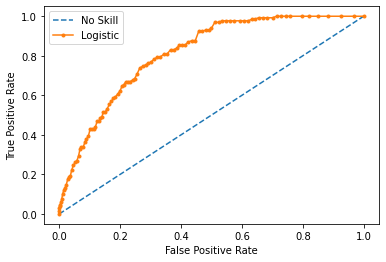

In [22]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [23]:
import math
gmeans = math.sqrt(tpr * (1-fpr))

TypeError: ignored

In [ ]:
from sklearn.metrics import precision_recall_curve
yhat = rf_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

In [24]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

yhat = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.811, F-Score=0.14931


In [25]:
predicted_new = (predicted [:,1] >= 0.811).astype('int')
accuracy = accuracy_score(y_test, predicted_new)
accuracy

0.9186316838259715

In [26]:
confusion_matrix(y_test, predicted_new)

array([[5489,  403],
       [  87,   43]])

In [27]:
roc_auc_score(y_test, predicted_new)

0.6311857016032169